In [19]:
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
First few rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C20485

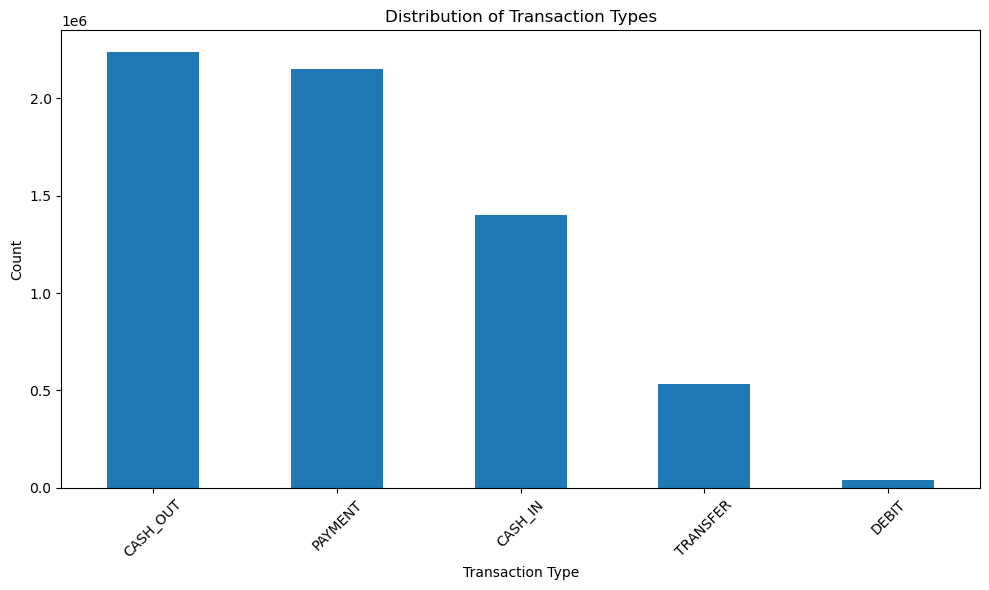

Analysis complete.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('Fraud.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print("\
First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\
Summary statistics:")
print(df.describe())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

# Plot distribution of transaction types
plt.figure(figsize=(10, 6))
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Analysis complete.")

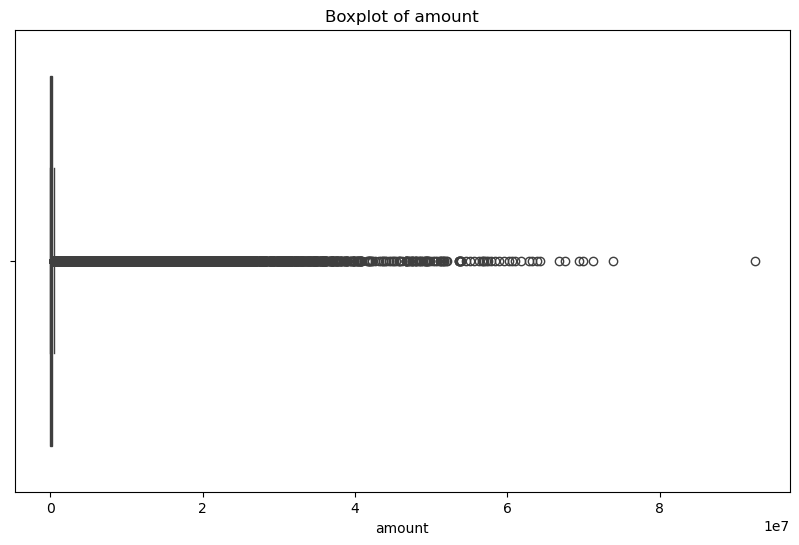

Summary statistics for 'amount':
count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64
Lower bound: -279608.29125
Upper bound: 501719.33875
Number of outliers: 338078
Percentage of outliers: 5.31%


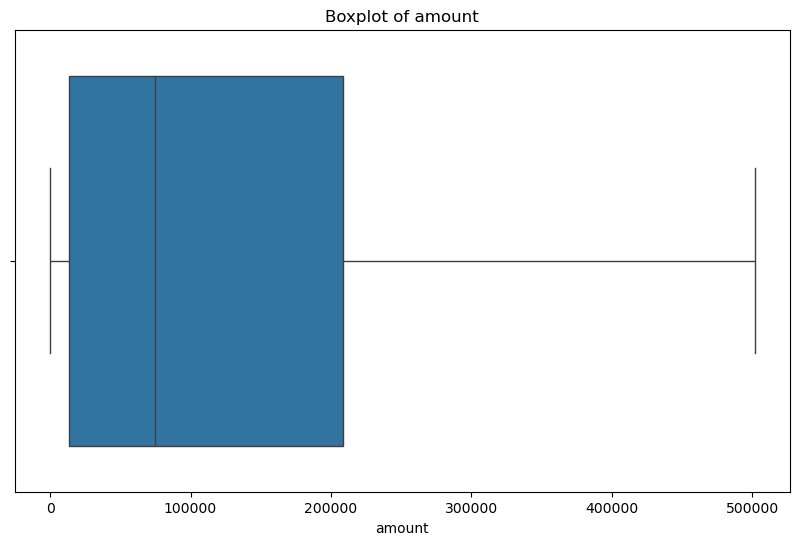

Summary statistics for 'amount' after capping outliers:
count    6.362620e+06
mean     1.322667e+05
std      1.462368e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      5.017193e+05
Name: amount, dtype: float64


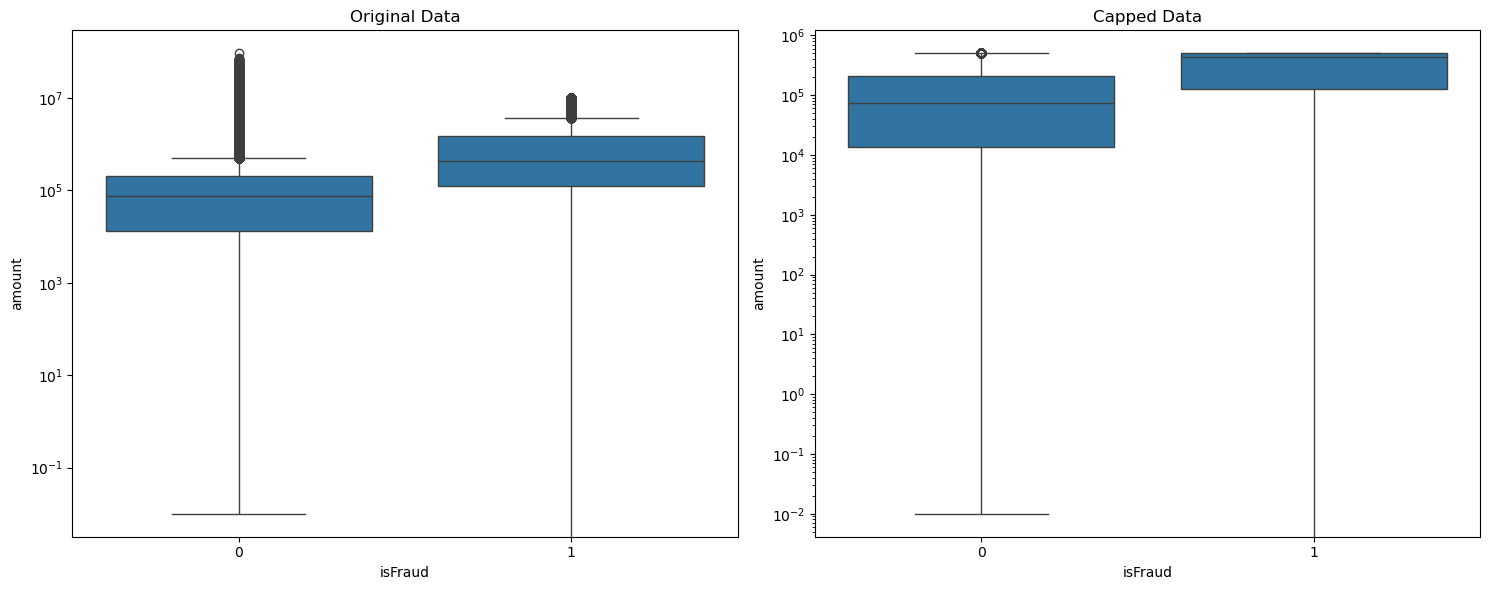

Outlier analysis and handling complete.


In [21]:

# Function to plot boxplot
def plot_boxplot(data, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Check for outliers in the 'amount' column
plot_boxplot(df, 'amount')

# Print summary statistics for 'amount'
print("Summary statistics for 'amount':")
print(df['amount'].describe())

# Calculate IQR and define outlier boundaries
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\
Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Count outliers
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"\
Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")

# Function to cap outliers
def cap_outliers(x, lower, upper):
    return np.clip(x, lower, upper)

# Create a new dataframe with capped outliers
df_capped = df.copy()
df_capped['amount'] = df_capped['amount'].apply(lambda x: cap_outliers(x, lower_bound, upper_bound))

# Plot boxplot of capped data
plot_boxplot(df_capped, 'amount')

print("\
Summary statistics for 'amount' after capping outliers:")
print(df_capped['amount'].describe())

# Compare fraud distribution before and after capping
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='isFraud', y='amount', data=df, ax=ax1)
ax1.set_title('Original Data')
ax1.set_yscale('log')

sns.boxplot(x='isFraud', y='amount', data=df_capped, ax=ax2)
ax2.set_title('Capped Data')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print("Outlier analysis and handling complete.")

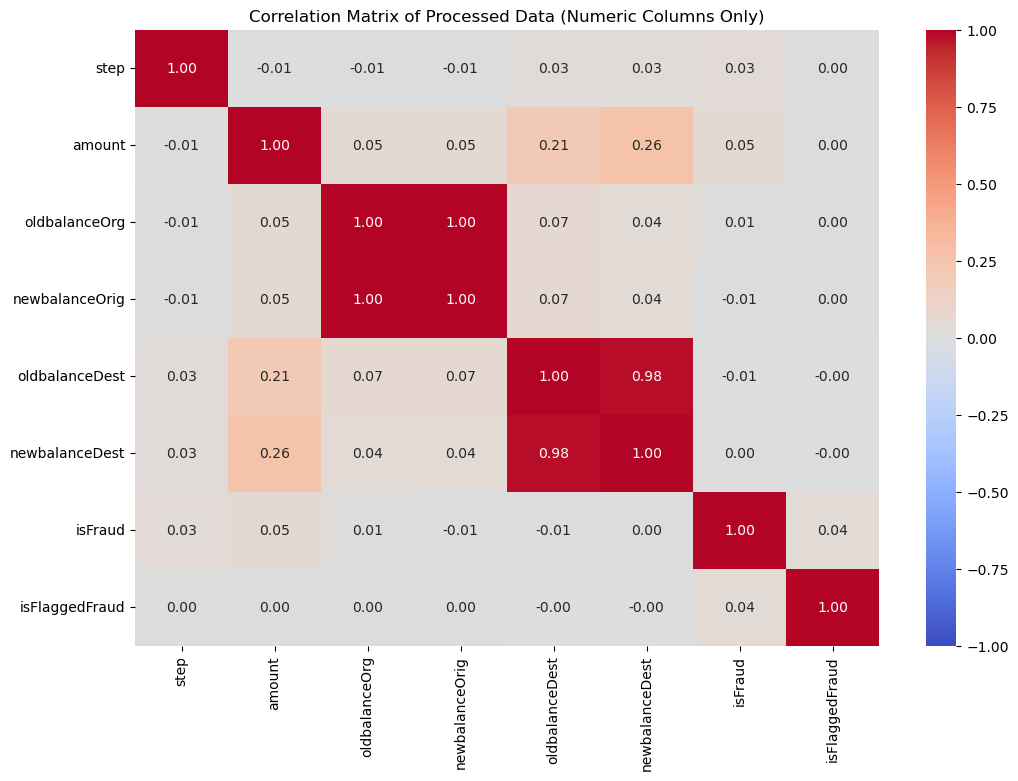

Highly correlated feature pairs:
('oldbalanceOrg', 'newbalanceOrig', 0.9988027631723787)
('newbalanceOrig', 'oldbalanceOrg', 0.9988027631723787)
('oldbalanceDest', 'newbalanceDest', 0.9765685054474923)
('newbalanceDest', 'oldbalanceDest', 0.9765685054474923)
Multicollinearity analysis complete.


In [22]:
# Select only numeric columns for correlation analysis
numeric_cols = df_capped.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Processed Data (Numeric Columns Only)')
plt.show()

# Identify pairs of highly correlated features
high_corr_pairs = [(i, j, corr_matrix[i][j]) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix[i][j]) > 0.8]

print("Highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

print("Multicollinearity analysis complete.")

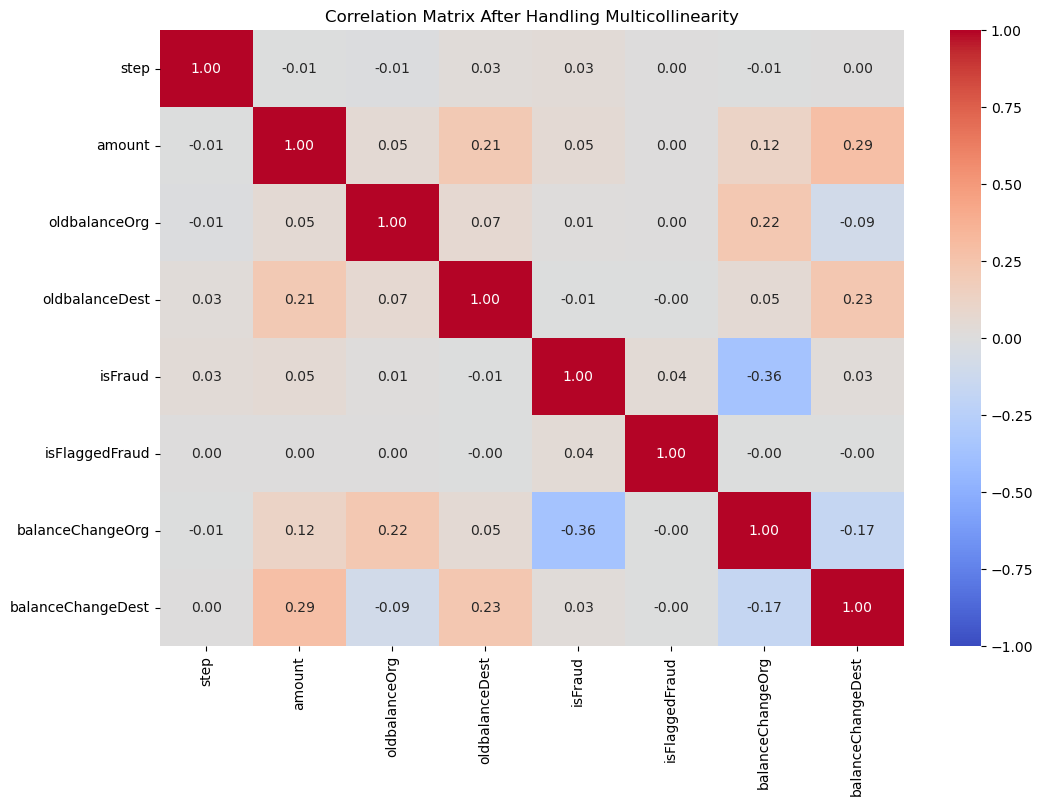

Remaining highly correlated feature pairs:
Multicollinearity handling complete.
First few rows of the processed dataframe:
   step      type    amount     nameOrig  oldbalanceOrg     nameDest  \
0     1   PAYMENT   9839.64  C1231006815       170136.0  M1979787155   
1     1   PAYMENT   1864.28  C1666544295        21249.0  M2044282225   
2     1  TRANSFER    181.00  C1305486145          181.0   C553264065   
3     1  CASH_OUT    181.00   C840083671          181.0    C38997010   
4     1   PAYMENT  11668.14  C2048537720        41554.0  M1230701703   

   oldbalanceDest  isFraud  isFlaggedFraud  balanceChangeOrg  \
0             0.0        0               0          -9839.64   
1             0.0        0               0          -1864.28   
2             0.0        1               0           -181.00   
3         21182.0        1               0           -181.00   
4             0.0        0               0         -11668.14   

   balanceChangeDest  
0                0.0  
1            

In [25]:
# Create new features
df_capped['balanceChangeOrg'] = df_capped['newbalanceOrig'] - df_capped['oldbalanceOrg']
df_capped['balanceChangeDest'] = df_capped['newbalanceDest'] - df_capped['oldbalanceDest']

# Remove the original highly correlated features
df_processed = df_capped.drop(['newbalanceOrig', 'newbalanceDest'], axis=1)

# Recalculate correlation matrix
numeric_cols = df_processed.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# Plot new heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Handling Multicollinearity')
plt.show()

# Check for remaining high correlations
high_corr_pairs = [(i, j, corr_matrix[i][j]) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix[i][j]) > 0.8]

print("Remaining highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

print("Multicollinearity handling complete.")

# Display the first few rows of the processed dataframe
print("\
First few rows of the processed dataframe:")
print(df_processed.head())

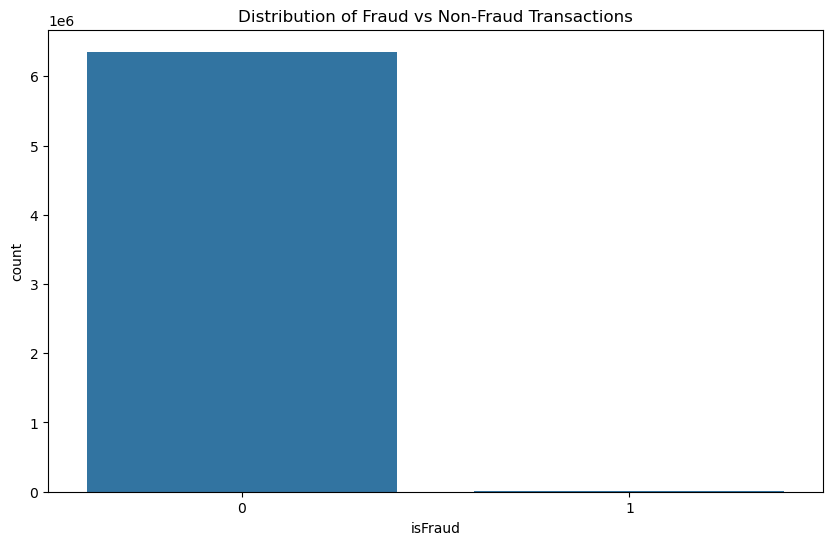

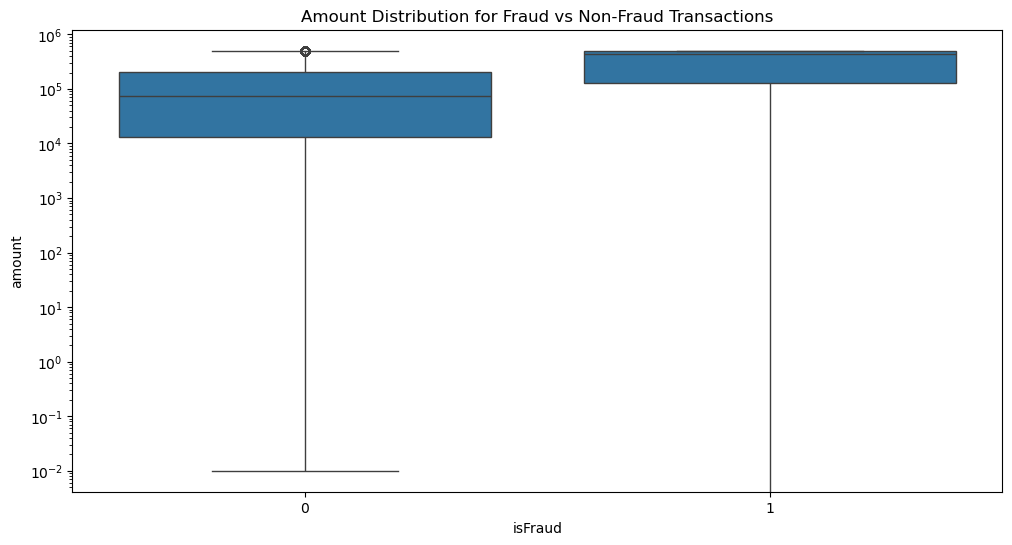

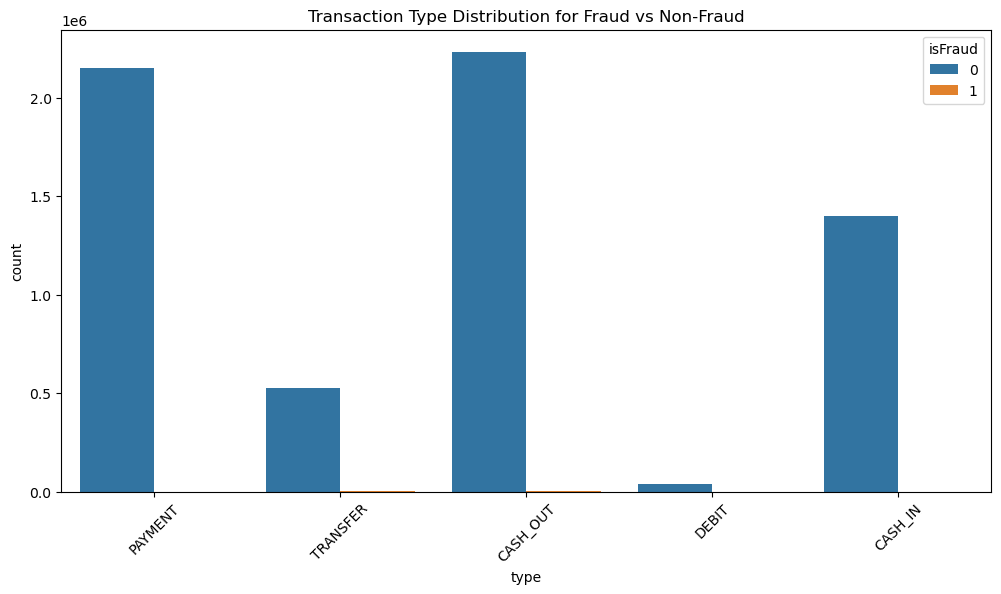

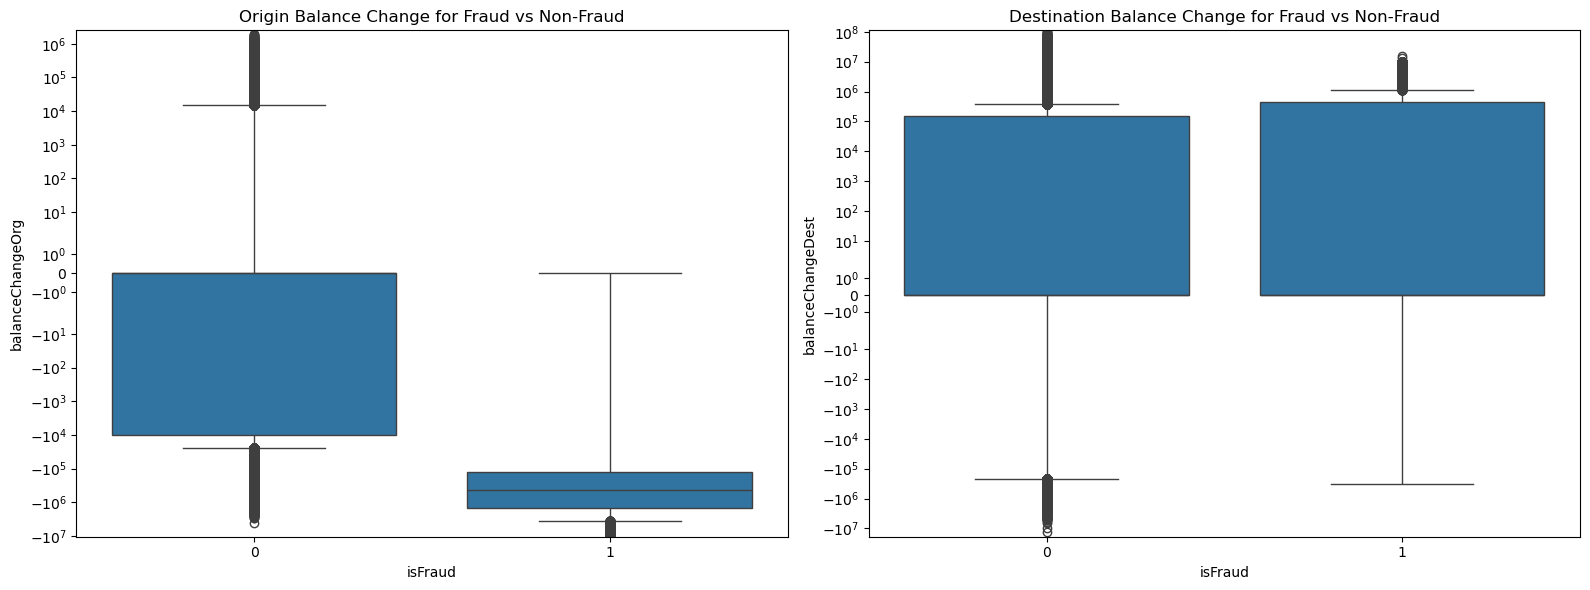

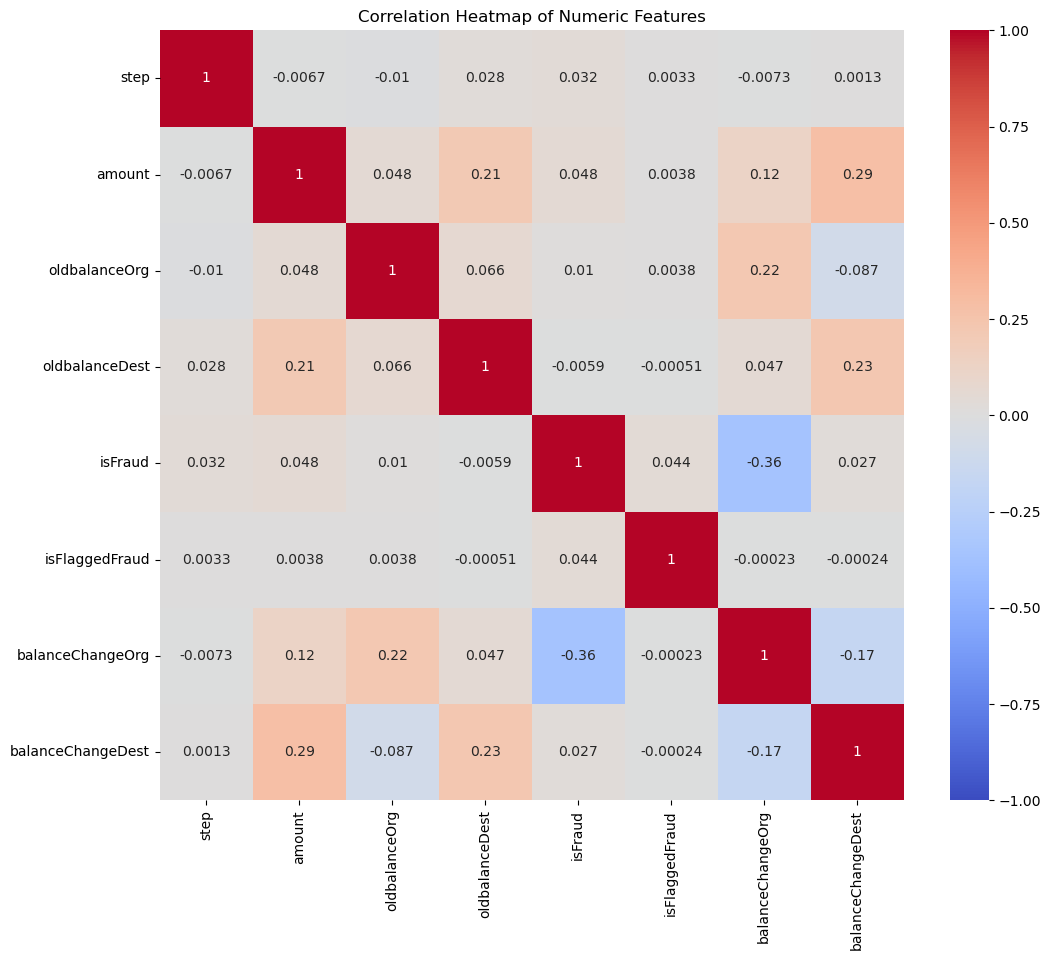

Visualization complete. Analyzing the data based on these visualizations...
Summary of Fraud Transactions:
              step         amount  oldbalanceOrg  oldbalanceDest  isFraud  \
count  8213.000000    8213.000000   8.213000e+03    8.213000e+03   8213.0   
mean    368.413856  327897.983288   1.649668e+06    5.442496e+05      1.0   
std     216.388690  192478.971401   3.547719e+06    3.336421e+06      0.0   
min       1.000000       0.000000   0.000000e+00    0.000000e+00      1.0   
25%     181.000000  127091.330000   1.258224e+05    0.000000e+00      1.0   
50%     367.000000  441423.440000   4.389835e+05    0.000000e+00      1.0   
75%     558.000000  501719.338750   1.517771e+06    1.478287e+05      1.0   
max     743.000000  501719.338750   5.958504e+07    2.362305e+08      1.0   

       isFlaggedFraud  balanceChangeOrg  balanceChangeDest  
count     8213.000000      8.213000e+03       8.213000e+03  
mean         0.001948     -1.457275e+06       7.354580e+05  
std          0.0

In [27]:
# 1. Distribution of fraud vs non-fraud transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=df_processed)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

# 2. Amount distribution for fraud vs non-fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df_processed)
plt.title('Amount Distribution for Fraud vs Non-Fraud Transactions')
plt.yscale('log')
plt.show()

# 3. Transaction type distribution for fraud vs non-fraud
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=df_processed)
plt.title('Transaction Type Distribution for Fraud vs Non-Fraud')
plt.xticks(rotation=45)
plt.show()

# 4. Balance change distribution for fraud vs non-fraud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='isFraud', y='balanceChangeOrg', data=df_processed, ax=ax1)
ax1.set_title('Origin Balance Change for Fraud vs Non-Fraud')
ax1.set_yscale('symlog')

sns.boxplot(x='isFraud', y='balanceChangeDest', data=df_processed, ax=ax2)
ax2.set_title('Destination Balance Change for Fraud vs Non-Fraud')
ax2.set_yscale('symlog')
plt.tight_layout()
plt.show()

# 5. Correlation heatmap for numeric features
numeric_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_processed[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

print("Visualization complete. Analyzing the data based on these visualizations...")

# Analysis of fraud transactions
fraud_data = df_processed[df_processed['isFraud'] == 1]
non_fraud_data = df_processed[df_processed['isFraud'] == 0]

print("\
Summary of Fraud Transactions:")
print(fraud_data.describe())

print("\
Transaction Types in Fraud Cases:")
print(fraud_data['type'].value_counts(normalize=True))

print("\
Comparison of Average Transaction Amounts:")
print("Fraud Transactions:", fraud_data['amount'].mean())
print("Non-Fraud Transactions:", non_fraud_data['amount'].mean())

print("\
Analysis complete.")

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data
X = df_processed.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_processed['isFraud']

# Encode categorical variables
le = LabelEncoder()
X['type'] = le.fit_transform(X['type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
selected_features = ['type', 'amount', 'oldbalanceOrg','oldbalanceDest', 'balanceChangeOrg','balanceChangeDest']
X = df_processed[selected_features]
y = df_processed['isFraud']

# One-hot encode 'type' column
X = pd.get_dummies(X, columns=['type'])

# Drop original balance columns
X = X.drop(['oldbalanceOrg',  'oldbalanceDest', ], axis=1)

# Print the new feature set
print("New feature set:")
print(X.columns)
print("\
Shape of X:", X.shape)
print("Number of fraud cases:", y.sum())
print("Percentage of fraud cases: {:.2f}%".format(y.mean() * 100))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\
Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

New feature set:
Index(['amount', 'balanceChangeOrg', 'balanceChangeDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
Shape of X: (6362620, 8)
Number of fraud cases: 8213
Percentage of fraud cases: 0.13%
Training set shape: (5090096, 8)
Testing set shape: (1272524, 8)


In [33]:
X

,amount,balanceChangeOrg,balanceChangeDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64000,-9839.64,0.00,False,False,False,True,False
1,1864.28000,-1864.28,0.00,False,False,False,True,False
2,181.00000,-181.00,0.00,False,False,False,False,True
3,181.00000,-181.00,-21182.00,False,True,False,False,False
4,11668.14000,-11668.14,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...
6362615,339682.13000,-339682.13,339682.13,False,True,False,False,False
6362616,501719.33875,-6311409.28,0.00,False,False,False,False,True
6362617,501719.33875,-6311409.28,6311409.27,False,True,False,False,False
6362618,501719.33875,-850002.52,0.00,False,False,False,False,True


In [27]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [59]:
df_processed.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,balanceChangeOrg,balanceChangeDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0,-11668.14,0.0


In [71]:
df_processed.to_csv('processed.csv')